In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
print('numpy: %s' % np.__version__)
import scipy
print('scipy: %s' % scipy.__version__)
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
import pandas
print('pandas: %s' % pandas.__version__)
import sklearn
print('sklearn: %s' % sklearn.__version__)

numpy: 1.19.4
scipy: 1.6.2
matplotlib: 3.3.3
pandas: 1.2.4
sklearn: 0.24.2


# Case Study: Higgs Boson Challenge
The challenge data is now available on http://opendata.cern.ch/collection/ATLAS-Higgs-Challenge-2014. The case study is to classify the events into signals and background, any other event other than the signal. This is a binary classification problem. Instead of the entier data set, we have used a sample data set which has training data size of 10000 and a separate testing data of size 5000 with labels on which models will be evaluated. We will also assume the best model is selected based on the classificatio0n accuracy achieved on the test data, with metrics of accuracy, as the data is well balanced between the two classes.

# 1. Loading Training and Testing CSV files using Pandas

In [3]:
from pandas import read_csv
train_file = './data/higgs_train_10k.csv'
test_file = './data/higgs_test_5k.csv'
names = [
    'response',
    'x1',
    'x2',
    'x3',
    'x4',
    'x5',
    'x6',
    'x7',
    'x8',
    'x9',
    'x10',
    'x11',
    'x12',
    'x13',
    'x14',
    'x15',
    'x16',
    'x17',
    'x18',
    'x19',
    'x20',
    'x21',
    'x22',
    'x23',
    'x24',
    'x25',
    'x26',
    'x27',
    'x28']
train_data = read_csv(train_file, names=names)
test_data = read_csv(test_file, names=names)
train_data.shape, test_data.shape

((10000, 29), (5000, 29))

# 2. Exploratory Data Analysis

In [4]:
# give the peek into the dataset
peek = train_data.head(20)
peek

,response,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
0,1.0,0.869,-0.635,0.22600,0.327,-0.6900,0.754,-0.2490,-1.0900,0.00,...,-0.0105,-0.045800,3.1,1.350,0.980,0.978,0.920,0.722,0.989,0.877
1,1.0,0.908,0.329,0.35900,1.500,-0.3130,1.100,-0.5580,-1.5900,2.17,...,-1.1400,-0.000819,0.0,0.302,0.833,0.986,0.978,0.780,0.992,0.798
2,1.0,0.799,1.470,-1.64000,0.454,0.4260,1.100,1.2800,1.3800,0.00,...,1.1300,0.900000,0.0,0.910,1.110,0.986,0.951,0.803,0.866,0.780
3,0.0,1.340,-0.877,0.93600,1.990,0.8820,1.790,-1.6500,-0.9420,0.00,...,-0.6780,-1.360000,0.0,0.947,1.030,0.999,0.728,0.869,1.030,0.958
4,1.0,1.110,0.321,1.52000,0.883,-1.2100,0.681,-1.0700,-0.9220,0.00,...,-0.3740,0.113000,0.0,0.756,1.360,0.987,0.838,1.130,0.872,0.808
5,0.0,1.600,-0.608,0.00707,1.820,-0.1120,0.848,-0.5660,1.5800,2.17,...,-0.6540,-1.270000,3.1,0.824,0.938,0.972,0.789,0.431,0.961,0.958
6,1.0,0.409,-1.880,-1.03000,1.670,-1.6000,1.340,0.0554,0.0135,2.17,...,0.0695,1.380000,3.1,0.869,1.220,1.000,0.545,0.699,0.977,0.829
7,1.0,0.934,0.629,0.52800,0.238,-0.9670,0.548,-0.0594,-1.7100,2.17,...,1.2900,-1.470000,0.0,0.902,1.080,0.980,0.783,0.849,0.894,0.775
8,1.0,1.410,0.537,0.69000,1.180,-0.1100,3.200,-1.5300,-1.5800,0.00,...,-0.1510,1.160000,0.0,1.670,4.040,1.180,1.050,1.540,3.530,2.740
9,1.0,1.180,0.104,1.40000,0.480,0.2660,1.140,1.5300,-0.2530,0.00,...,0.2690,0.530000,0.0,0.833,0.774,0.986,1.100,0.849,0.937,0.812


In [5]:
# datatype of each feature
types = train_data.dtypes
types

response    float64
x1          float64
x2          float64
x3          float64
x4          float64
x5          float64
x6          float64
x7          float64
x8          float64
x9          float64
x10         float64
x11         float64
x12         float64
x13         float64
x14         float64
x15         float64
x16         float64
x17         float64
x18         float64
x19         float64
x20         float64
x21         float64
x22         float64
x23         float64
x24         float64
x25         float64
x26         float64
x27         float64
x28         float64
dtype: object

In [6]:
# base statistics for data
from pandas import set_option
set_option('display.width', 100)
set_option('precision', 5)
description = train_data.describe()
description

,response,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,...,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,0.52950,0.99794,-0.01666,-0.00347,0.99140,-0.00980,0.99203,-0.00148,0.00375,1.00402,...,0.00125,-0.01481,0.99851,1.02914,1.02142,1.05084,1.01251,0.96770,1.03122,0.95787
std,0.49915,0.57498,1.00302,1.01083,0.59549,1.00477,0.47739,1.00408,1.01590,1.02555,...,1.00542,1.00101,1.39611,0.63723,0.36961,0.16594,0.40492,0.52318,0.36620,0.31336
min,0.00000,0.27500,-2.43000,-1.74000,0.01240,-1.74000,0.15900,-2.94000,-1.74000,0.00000,...,-2.50000,-1.74000,0.00000,0.17200,0.34200,0.46100,0.38400,0.08100,0.38900,0.44500
25%,0.00000,0.59600,-0.74400,-0.87200,0.57100,-0.88600,0.68000,-0.68250,-0.89225,0.00000,...,-0.70800,-0.88500,0.00000,0.79000,0.84700,0.98600,0.76800,0.67500,0.82300,0.77100
50%,1.00000,0.85900,-0.02880,0.00064,0.88600,-0.01995,0.89750,-0.00993,0.02040,1.09000,...,-0.00129,-0.01410,0.00000,0.89500,0.94900,0.99000,0.91700,0.86900,0.94550,0.87150
75%,1.00000,1.25000,0.71500,0.88200,1.29000,0.85700,1.17000,0.68000,0.87900,2.17000,...,0.72000,0.84700,3.10000,1.02000,1.08000,1.02000,1.15000,1.12000,1.13000,1.06000
max,1.00000,6.70000,2.43000,1.74000,5.82000,1.74000,7.06000,2.97000,1.74000,2.17000,...,2.50000,1.74000,3.10000,13.10000,7.39000,3.68000,6.58000,8.26000,4.75000,4.32000


In [7]:
# class distribution for train and test
train_data_class = train_data.groupby('response').size()
test_data_class = test_data.groupby('response').size()
train_data_class, test_data_class

(response
 0.0    4705
 1.0    5295
 dtype: int64,
 response
 0    2315
 1    2685
 dtype: int64)

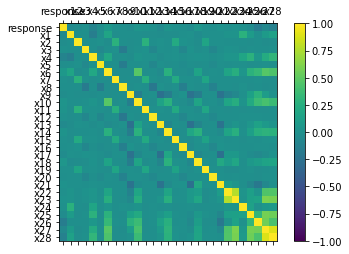

In [8]:
# pearsons correlation to understand feature independence
correlations = train_data.corr(method='pearson')
# visualize the correlations
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 29, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.rcParams['figure.figsize'] = (30, 30)
plt.show()

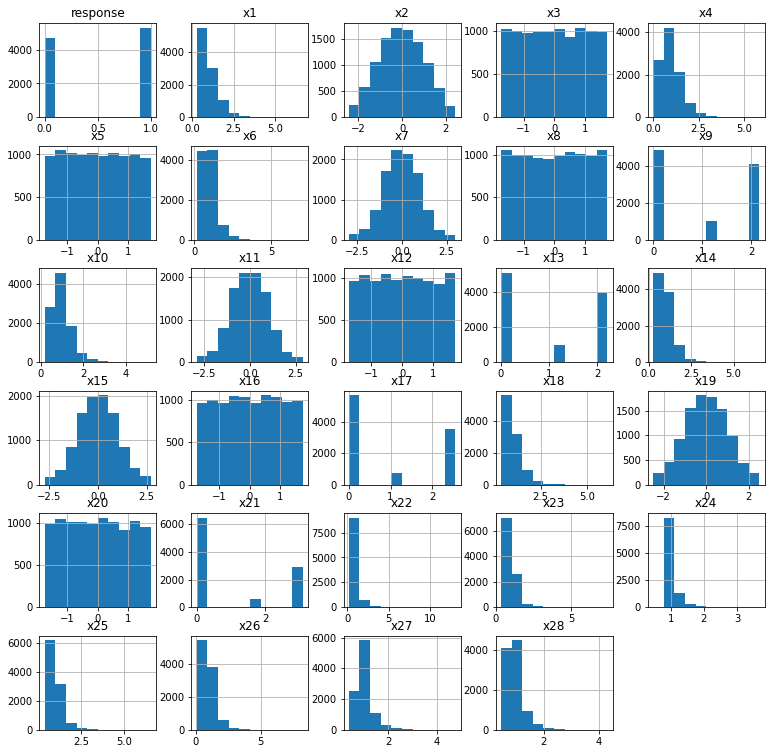

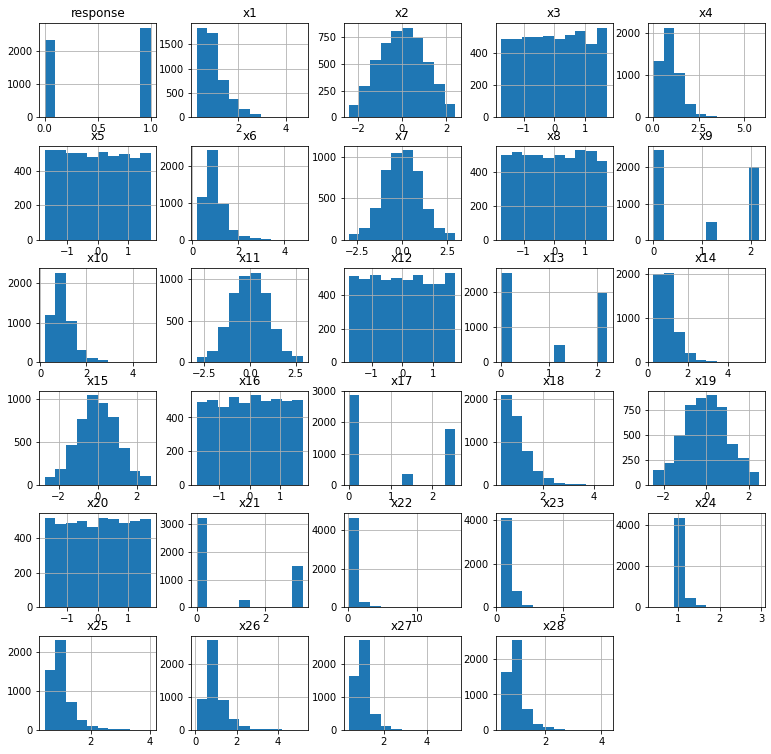

In [9]:
# visualize using plt and histograms of training and testing data
plt.rcParams['figure.figsize'] = (13, 13)
train_data.hist()
test_data.hist()
plt.show()

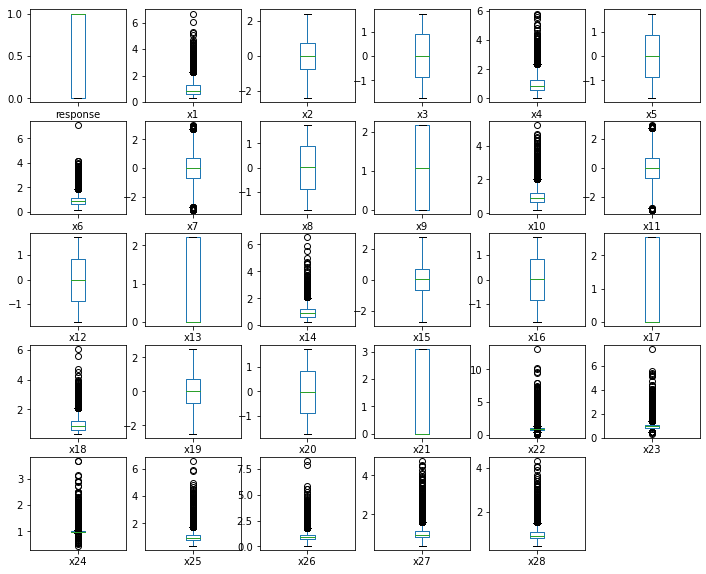

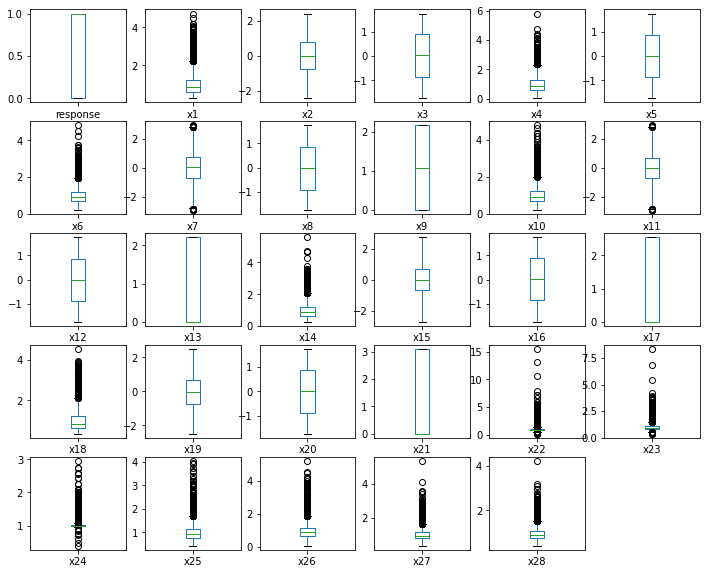

In [10]:
# boxplot visualization of train and test data
plt.rcParams['figure.figsize'] = (12, 12)
train_data.plot(kind='box', subplots=True, layout=(6, 6), sharex=False, sharey=False)
test_data.plot(kind='box', subplots=True, layout=(6, 6), sharex=False, sharey=False)
plt.show()

# Train and Test Data as Vector/Matrix Representation for Modeling

In [11]:
# train data (from Pandas DataFrame to Numpy)
train_array = train_data.values
# Separate array into input and output variables
X_train = train_array[:, 1:]
y_train = train_array[:, 0]
# test data
test_array = test_data.values
# Separate array into input and output variables
X_test = test_array[:,1:]
y_test = test_array[:, 0]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10000, 28), (10000,), (5000, 28), (5000,))

## Manifold Visualization of Data

Isomap: 55 sec


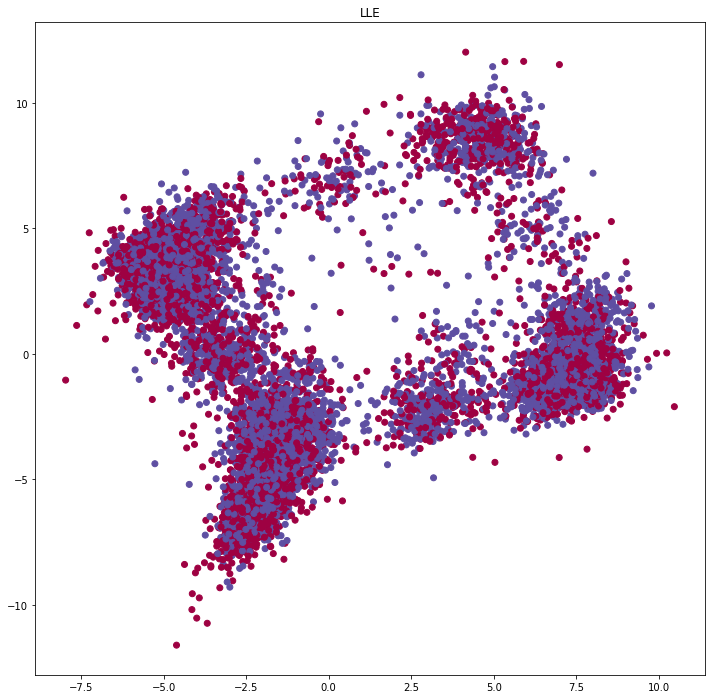

Isomap: 52 sec


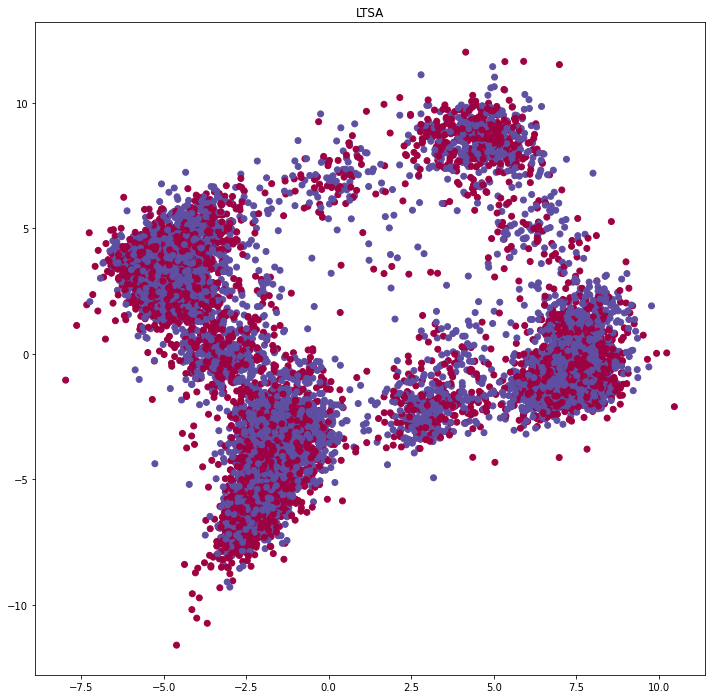

Isomap: 54 sec


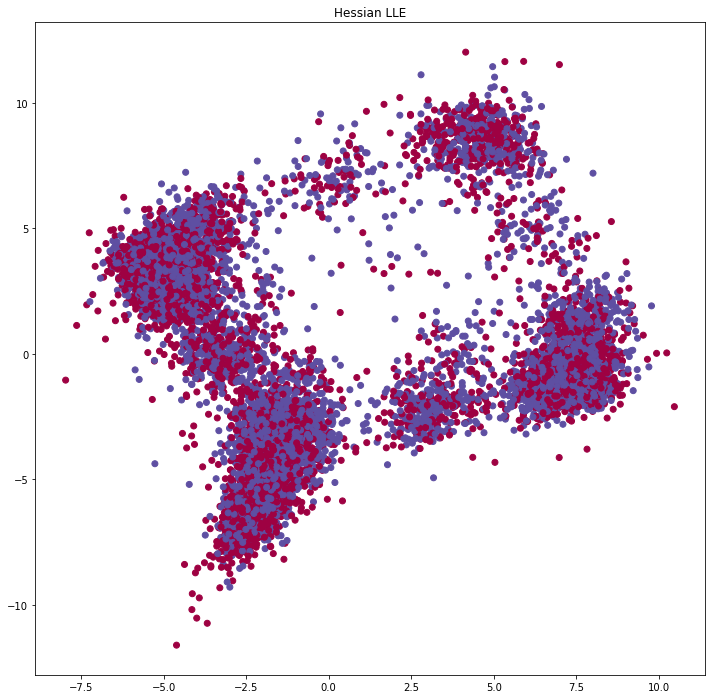

Isomap: 55 sec


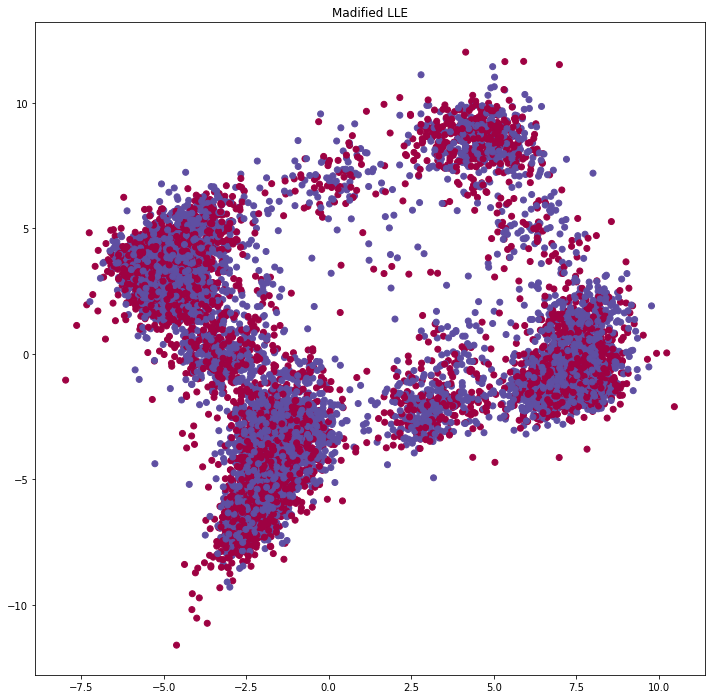

MDS: 1.6e+02 sec


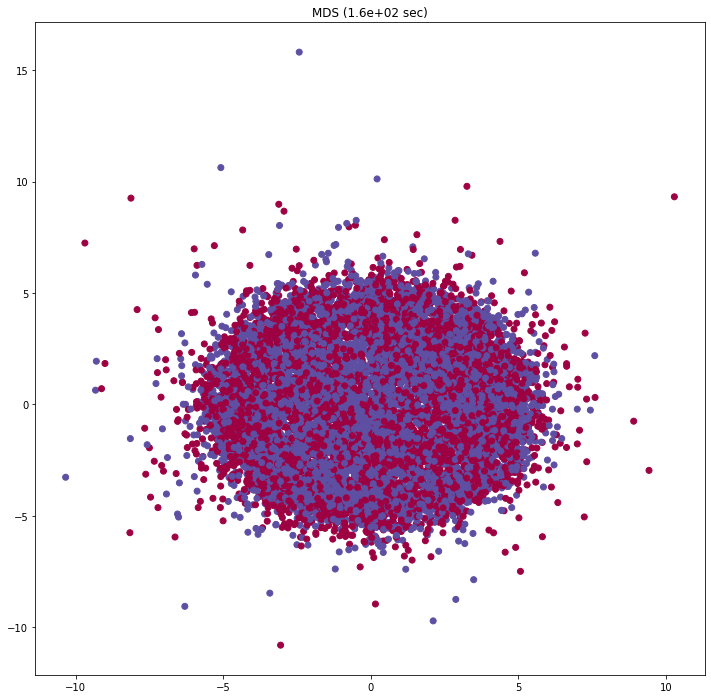

SpectralEmbedding: 52 sec


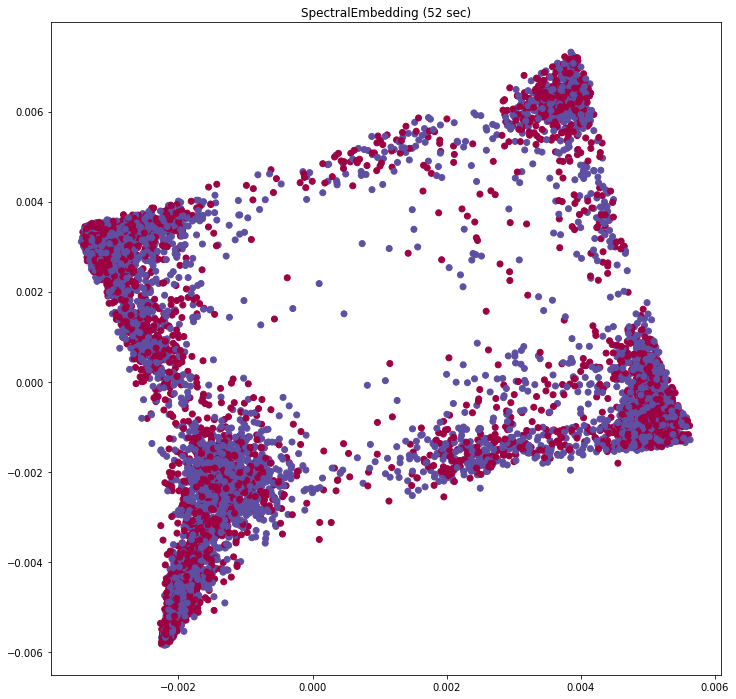

t-SNE: 15 sec


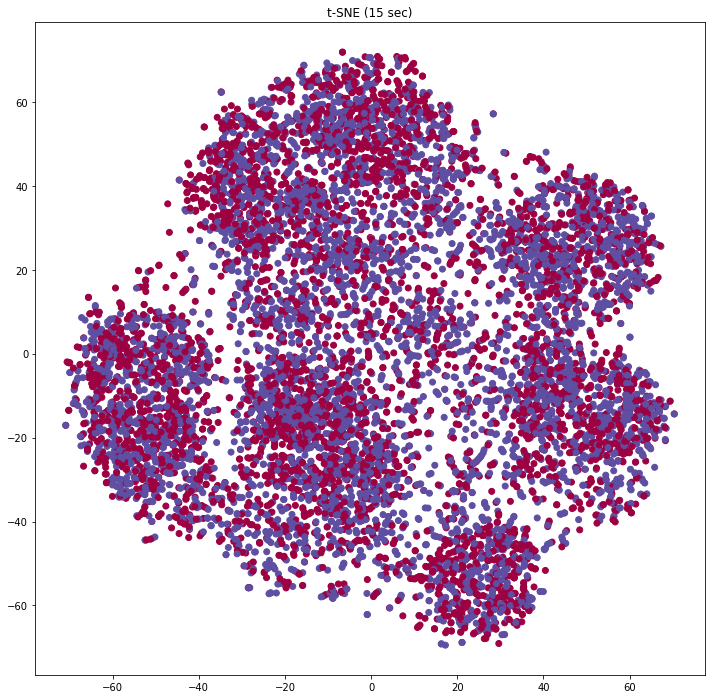

In [12]:
from time import time
from matplotlib.ticker import NullFormatter
from sklearn import manifold

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Madified LLE']

n_neighbors = 10
n_components = 2
color=y_train

for i, method in enumerate(methods):
    t0 = time()
    Ytransformed = manifold.Isomap(n_neighbors, n_components).fit_transform(X_train)
    t1 = time()
    print("Isomap: %.2g sec" % (t1 - t0))
    ax = fig.add_subplot(257)
    plt.scatter(Ytransformed[:, 0], Ytransformed[:, 1],c=color, cmap=plt.cm.Spectral)
    plt.title(labels[i])
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
    plt.show()


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Ytransformed = mds.fit_transform(X_train)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Ytransformed[:, 0], Ytransformed[:, 1], c=color,cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()


t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Ytransformed = se.fit_transform(X_train)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(Ytransformed[:, 0], Ytransformed[:, 1], c=color,cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Ytransformed = tsne.fit_transform(X_train)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Ytransformed[:, 0], Ytransformed[:, 1], c=color,cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

# Feature Transformation using PCA

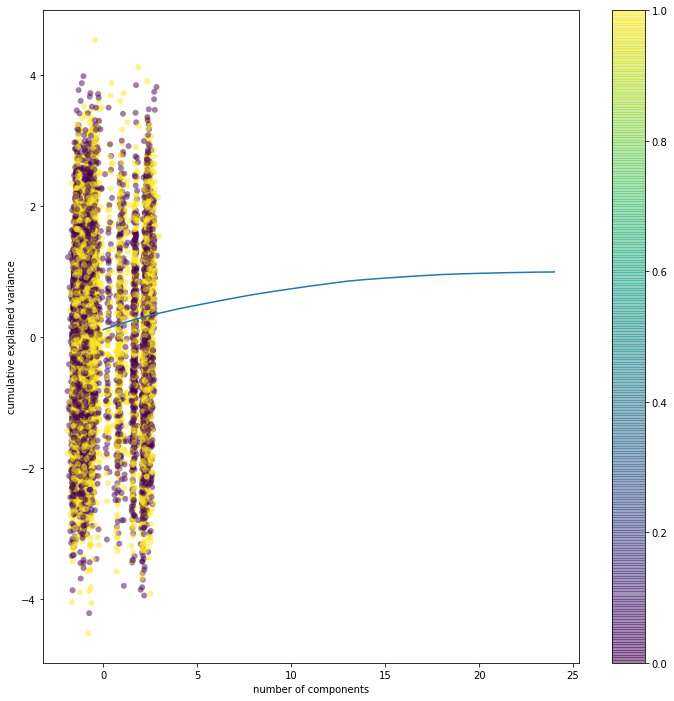

Explained Variance; [0.11617423 0.09724636 0.08462173 0.0703918  0.06565612 0.05638677
 0.05617325 0.05403749 0.05190442 0.04491793 0.04241168 0.04098986
 0.03849396 0.03692146 0.02611916 0.02077877 0.0193933  0.01827731
 0.01656562 0.01043725 0.00783228 0.00705268 0.00586116 0.00529837
 0.00311633]


In [13]:
# Feature decomposition with PCA
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=2)
fit = pca.fit(X_train)
projected = pca.fit_transform(X_train)

plt.scatter(projected[:, 0], projected[:, 1], c=y_train, edgecolor='none', alpha=0.5)
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.rcParams['figure.figsize'] = (8, 8)
plt.colorbar()

pca = PCA(n_components=25)
fit = pca.fit(X_train)
plt.plot(np.cumsum(fit.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
# summarize components
print('Explained Variance; %s' % fit.explained_variance_ratio_)

# 5. Feature Selection impact and scores on Training Data

In [18]:
from sklearn import preprocessing
from sklearn.feature_selection import chi2

min_max_scaler = preprocessing.MinMaxScaler()
scaler = min_max_scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
chi2_score = chi2(X_train_scaled, y_train)[0]
features = names[1:]
fscores = zip(features, chi2_score)
wchi2 = sorted(fscores, key=lambda x: x[1], reverse=True)
scores_labels = np.asarray(wchi2)
print(scores_labels)
label = [row[0] for row in scores_labels]
print(label)
score = [row[1] for row in scores_labels]
print(score)
y_pos = np.arange(len(score))
yrange = range(len(score))
print(yrange)

[['x26' '8.90346287406173']
 ['x13' '8.873767232814412']
 ['x28' '7.214717637097614']
 ['x4' '6.0745530786596005']
 ['x17' '5.020814821701416']
 ['x21' '3.0510676840250426']
 ['x9' '1.9768680369522516']
 ['x27' '1.9373519120568163']
 ['x18' '1.909799833010493']
 ['x6' '1.6978376560701287']
 ['x1' '1.3412511268408103']
 ['x10' '0.7150322189439381']
 ['x11' '0.3380142518419011']
 ['x25' '0.32381562342198966']
 ['x14' '0.3217357786256987']
 ['x2' '0.27317919170713356']
 ['x5' '0.16518358983682604']
 ['x23' '0.0850254388420135']
 ['x19' '0.04429125896575771']
 ['x8' '0.03693118126530916']
 ['x20' '0.03260105301887274']
 ['x3' '0.024821121895413342']
 ['x15' '0.012855629792167884']
 ['x12' '0.009810181623275838']
 ['x22' '0.0074272620516064244']
 ['x16' '0.006749348941104573']
 ['x24' '0.006720238048007796']
 ['x7' '0.0023612319542301126']]
['x26', 'x13', 'x28', 'x4', 'x17', 'x21', 'x9', 'x27', 'x18', 'x6', 'x1', 'x10', 'x11', 'x25', 'x14', 'x2', 'x5', 'x23', 'x19', 'x8', 'x20', 'x3', 'x15'

# 6. Model Creation, Tuning Hyperparameters and Validation using Training Data

In [17]:
# Perform grid search to find the best parameter
# for Logistic Regression, Perceptron, Naive Bayes, LDA algorithm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# using roc AUC as scoring
scoring = 'accuracy'

# Naive Bayes
naiveBayes = GaussianNB()
nbscore = cross_val_score(naiveBayes, X_train, y_train, cv=3, scoring=scoring)
print('Naive Bayes CV score =', np.mean(nbscore))

# penalty
penalties = np.array(['l1', 'l2'])
# C for logistic regression
c_values = np.array([1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001])
# max iteration
iters = np.array([100, 150])
LR_param_grid = {'penalty': penalties, 'C': c_values, 'max_iter': iters}

# logistic regression as algorithm
gridLogisticRegression = LogisticRegression()
# Using GridSearchCV on Training Data for LR
grid = GridSearchCV(estimator=gridLogisticRegression,
                    param_grid=LR_param_grid,
                    scoring=scoring)
grid.fit(X_train, y_train)
print('LR CVScore ', grid.best_score_)
print('LR Penalty ', grid.best_estimator_.penalty)
print('LR C ', grid.best_estimator_.C)
print('LR Max Iterations ', grid.best_estimator_.max_iter)

# Perceptron
# Using GridSearchCV on Training data for perceptron
# alphas
alphas = np.array([0.001, 0.0001, 0.00001, 0.000001])
# iterations
perceptron_param_grid = {'alpha': alphas, 'max_iter': iters}
grid = GridSearchCV(estimator=Perceptron(),
                    param_grid=perceptron_param_grid,
                    scoring=scoring)
grid.fit(X_train, y_train)
print('Perceptron CVScore ', grid.best_score_)
print('Perceptron alpha ', grid.best_estimator_.alpha)
print('Perceptron Max Iterations', grid.best_estimator_.max_iter)

# LDA
tols = np.array([0.001, 0.00001, 0.001])
lda_param_grid = {'tol': tols}
grid = GridSearchCV(estimator=LinearDiscriminantAnalysis(),
                    param_grid=lda_param_grid,
                    scoring=scoring)
grid.fit(X_train, y_train)
print('LDA CVScore ', grid.best_score_)
print('LDA tol ', grid.best_estimator_.tol)

Naive Bayes CV score = 0.6009992120987743
LR CVScore  0.6429
LR Penalty  l2
LR C  100.0
LR Max Iterations  100
Perceptron CVScore  0.5589999999999999
Perceptron alpha  0.001
Perceptron Max Iterations 100
LDA CVScore  0.6421
LDA tol  0.001


# 7. SVM Grid Search

In [20]:
from sklearn.svm import SVC

# gamma parameter in SVM
gammas = np.array([1, 0.1, 0.01, 0.001])
# C for logistic regression
c_values = np.array([100, 1, 0.1, 0.01])
svm_param_grid = {'gamma': gammas, 'C': c_values}
svm = SVC(kernel='rbf')
scoring = 'accuracy'
grid = GridSearchCV(estimator=svm,
                    param_grid=svm_param_grid,
                    scoring=scoring)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_.gamma)
print(grid.best_estimator_.C)

0.6578000000000002
0.01
100.0


# 8. Pipeline with Feature Reduction Selection, Logistic Regression using Grid Search

Automatically created module for IPython interactive environment


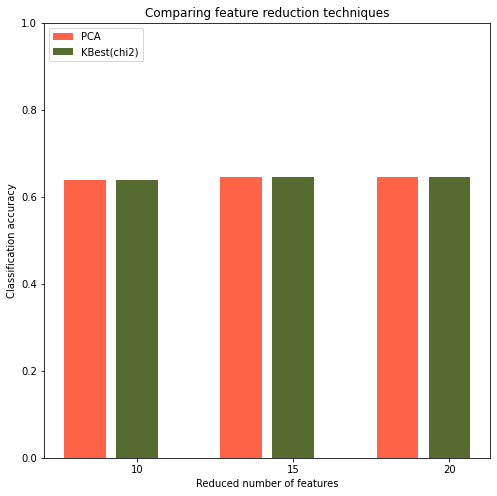

In [22]:
# Modified the Code for changes
# Original Authors: Robert McGibbon, Joel Nothman, Guillaume Lemaitre

from sklearn.datasets import load_digits
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest


# transform the features using MinMaxScaler as many are negatives
min_max_scaler = preprocessing.MinMaxScaler()
scaler = min_max_scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

print(__doc__)

pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', LogisticRegression())
])

N_FEATURES_OPTIONS = [10, 15, 20]
C_OPTIONS = [0.001, 0.1, 1, 10, 100, 1000]
max_iter_OPTIONS = [100, 150]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=10)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS,
        'classify__max_iter':max_iter_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS,
        'classify__max_iter':max_iter_OPTIONS
    },
]
reducer_labels = ['PCA', 'KBest(chi2)']

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)
grid.fit(X_train_scaled, y_train)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = ['tomato', 'darkolivegreen', 'lightsteelblue']
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')
plt.show()

# 9. Learning Curves on the Model with Training and Validation

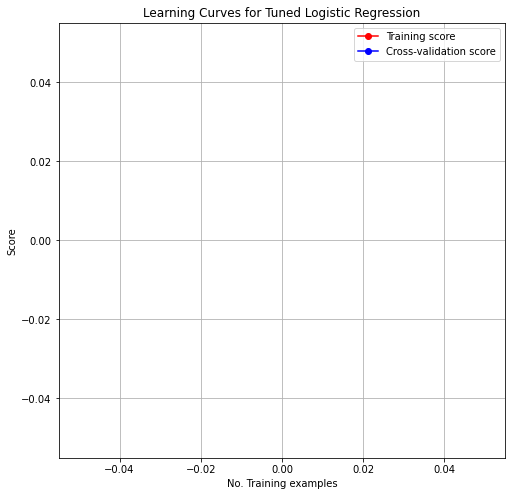

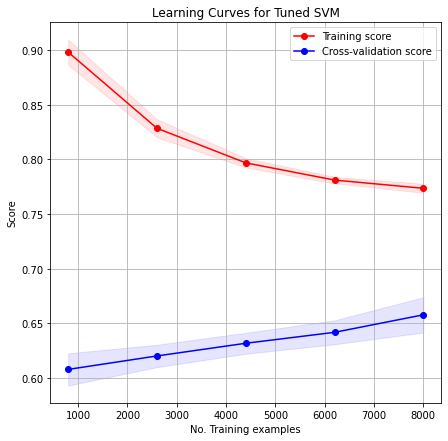

In [23]:
# learning curves
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, name, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title('Learning Curves for ' + name)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("No. Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


estimator = LogisticRegression(C=0.1, penalty='l1', max_iter=100)
plot_learning_curve(estimator, 'Tuned Logistic Regression', X_train, y_train)
plt.rcParams['figure.figsize'] = (7, 7)
plt.show()
estimator = SVC(C=100, gamma=0.01, kernel='rbf')
plot_learning_curve(estimator, 'Tuned SVM', X_train, y_train)
plt.rcParams['figure.figsize'] = (7, 7)
plt.show()

# 10. Model Selection, Training on Entire Train Set and Estimating on Test Set

In [25]:
from time import time
from sklearn import metrics
# train and test classifiers


def train_and_test(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)
    print("classification report:")
    print(metrics.classification_report(y_test, pred))
    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time


results = []
for classifier, name in (
    (LogisticRegression(
        C=0.1, penalty='l2', max_iter=100), "Logistic Regressin"), (Perceptron(
            alpha=0.001, max_iter=100), "Perceptron"), (LinearDiscriminantAnalysis(
                tol=0.001), "LDA"), (GaussianNB(), "Naive Bayes"), (SVC(
                    C=100, gamma=0.01, kernel='rbf'), "SVM")):
    print('=' * 80)
    print(name)
    results.append(train_and_test(classifier))

    
indices = np.arange(len(results))
results = [[x[i] for x in results] for i in range(4)]

Logistic Regressin
________________________________________________________________________________
Training: 
LogisticRegression(C=0.1)
train time: 0.057s
test time:  0.000s
accuracy:   0.644
classification report:
              precision    recall  f1-score   support

         0.0       0.63      0.55      0.59      2315
         1.0       0.65      0.73      0.69      2685

    accuracy                           0.64      5000
   macro avg       0.64      0.64      0.64      5000
weighted avg       0.64      0.64      0.64      5000


Perceptron
________________________________________________________________________________
Training: 
Perceptron(alpha=0.001, max_iter=100)
train time: 0.009s
test time:  0.000s
accuracy:   0.584
classification report:
              precision    recall  f1-score   support

         0.0       0.65      0.22      0.33      2315
         1.0       0.57      0.90      0.70      2685

    accuracy                           0.58      5000
   macro avg      

# 11. Plotting ROC Curves on Trained Models on Test Set

No handles with labels found to put in legend.


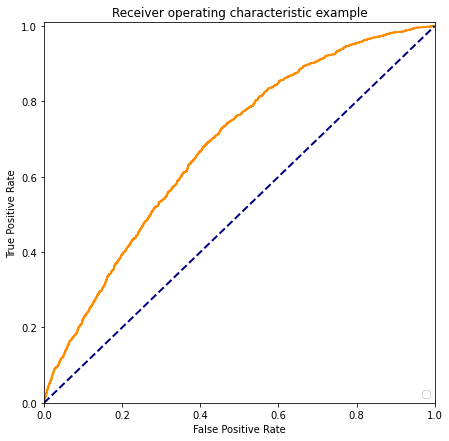

In [27]:
lr = LogisticRegression(C=0.1, penalty='l2', max_iter=150)
lr.fit(X_train, y_train)
lrpreds = lr.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, lrpreds)
plt.figure()
lw = 2
plt.plot(lr_fpr, lr_tpr, color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.rcParams['figure.figsize'] = (5,5)
plt.show()

# 12. Using Other Algorithms

KNN: 0.592331 (0.011044)
CART: 0.617773 (0.014083)
Bag: 0.771852 (0.013305)
RF: 0.772276 (0.014611)
Bo: 0.614885 (0.014328)
ELE: 0.685046 (0.020494)


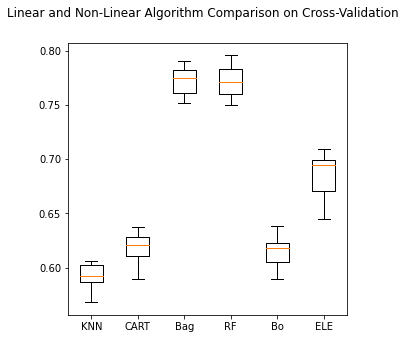

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold

# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('Bag', BaggingClassifier(DecisionTreeClassifier(),100, random_state=7)))
models.append(('RF', RandomForestClassifier(100, max_features=5)))
models.append(('Bo', AdaBoostClassifier(DecisionTreeClassifier(),100, random_state=7)))
# create a voting estimation 
estimators = []
estimators.append(('logistic',LogisticRegression()))
estimators.append(('NB',  GaussianNB()))
models.append(('ELE',VotingClassifier(estimators, voting='soft')))


# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
# replace with 'accuracy', 'neg_log_loss',.. based on the need
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure() 
fig.suptitle('Linear and Non-Linear Algorithm Comparison on Cross-Validation') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()